In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [26]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\PYTHON\datasets\medical_dataset\insurance.csv")

In [27]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
corr_data = data.select_dtypes(include=['int64', 'float'])
corr_data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [31]:
df_smoker = data[data['smoker']=='yes']
df_nonsmoker = data[data['smoker']=='no']
len(df_smoker)
len(df_nonsmoker)

1064

Text(0, 0.5, 'charges')

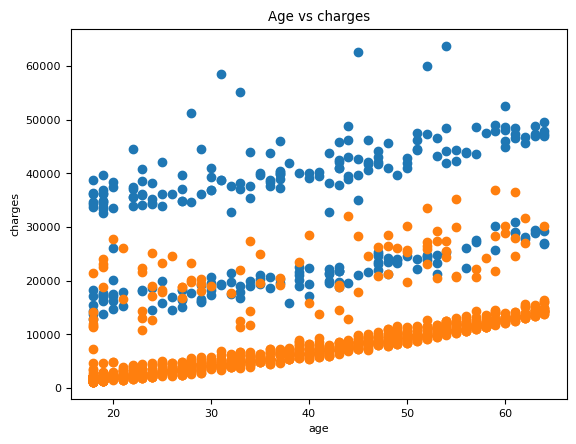

In [32]:
# age vs charge of smoker and nonsmokers 
plt.scatter(df_smoker.age, df_smoker.charges, label = 'smoker')
plt.scatter(df_nonsmoker.age, df_nonsmoker.charges, label = 'nonsmoker')
plt.title("Age vs charges")
plt.xlabel("age")
plt.ylabel("charges")

Text(0, 0.5, 'charges')

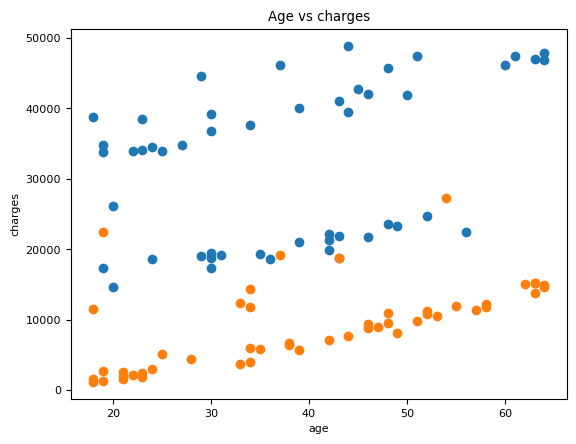

In [33]:
smoker_reduced = df_smoker.sample(50)
nonsmoker_reduced = df_nonsmoker.sample(50)
plt.scatter(smoker_reduced.age, smoker_reduced.charges, label = 'smoker')
plt.scatter(nonsmoker_reduced.age, nonsmoker_reduced.charges, label = 'nonsmoker')
plt.title("Age vs charges")
plt.xlabel("age")
plt.ylabel("charges")

Text(0.5, 1.0, 'age vs charges')

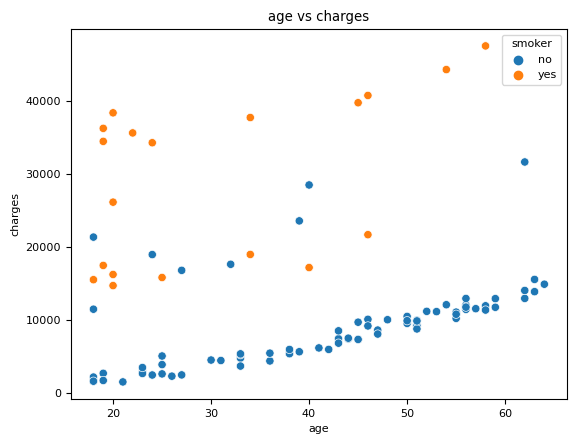

In [34]:
data_red = data.sample(100)
sns.scatterplot(x = "age", y = "charges", data = data_red, hue = 'smoker')
# sns.scatterplot(x = "age", y = "charges", data = nonsmoker_reduced)
plt.title("age vs charges")

LinregressResult(slope=257.7226186668954, intercept=3165.8850060630302, rvalue=0.2990081933306476, pvalue=4.886693331718841e-29, stderr=22.5023892867703, intercept_stderr=937.1494650703767)


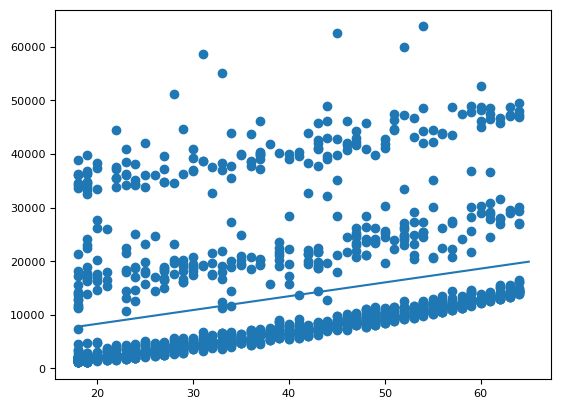

In [35]:
print(stats.linregress(data.age, data.charges))
# y = mx + c
# y = slope(x) + intercept

m, b, r, p, err = stats.linregress(data.age, data.charges)
x = range(18, data.age.max()+2)
y = m * x + b
plt.plot(x, y)

plt.scatter(data.age, data.charges)
plt.show()

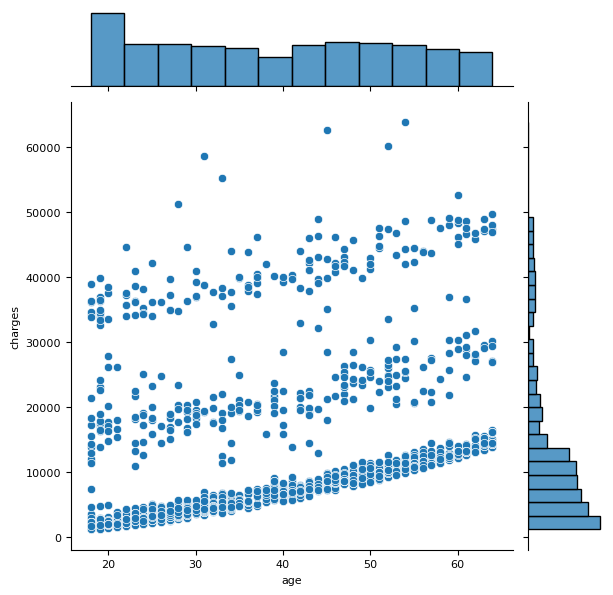

In [36]:
sns.set_color_codes(palette='deep')
sns.jointplot(x = 'age', y = 'charges', data = data);

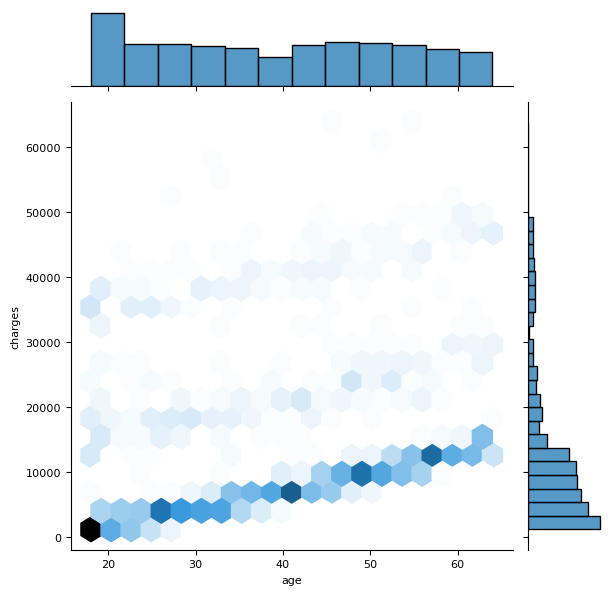

In [37]:
sns.jointplot(x = 'age', y = 'charges', data = data, kind = 'hex');

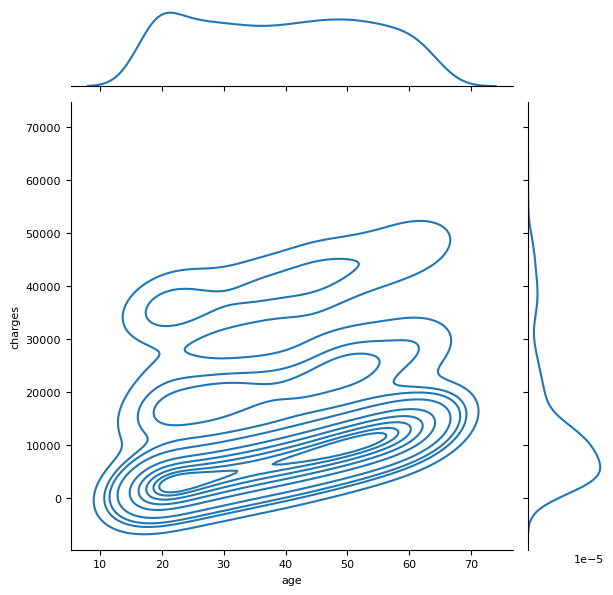

In [38]:
sns.jointplot(x = 'age', y = 'charges', data = data, kind = 'kde');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

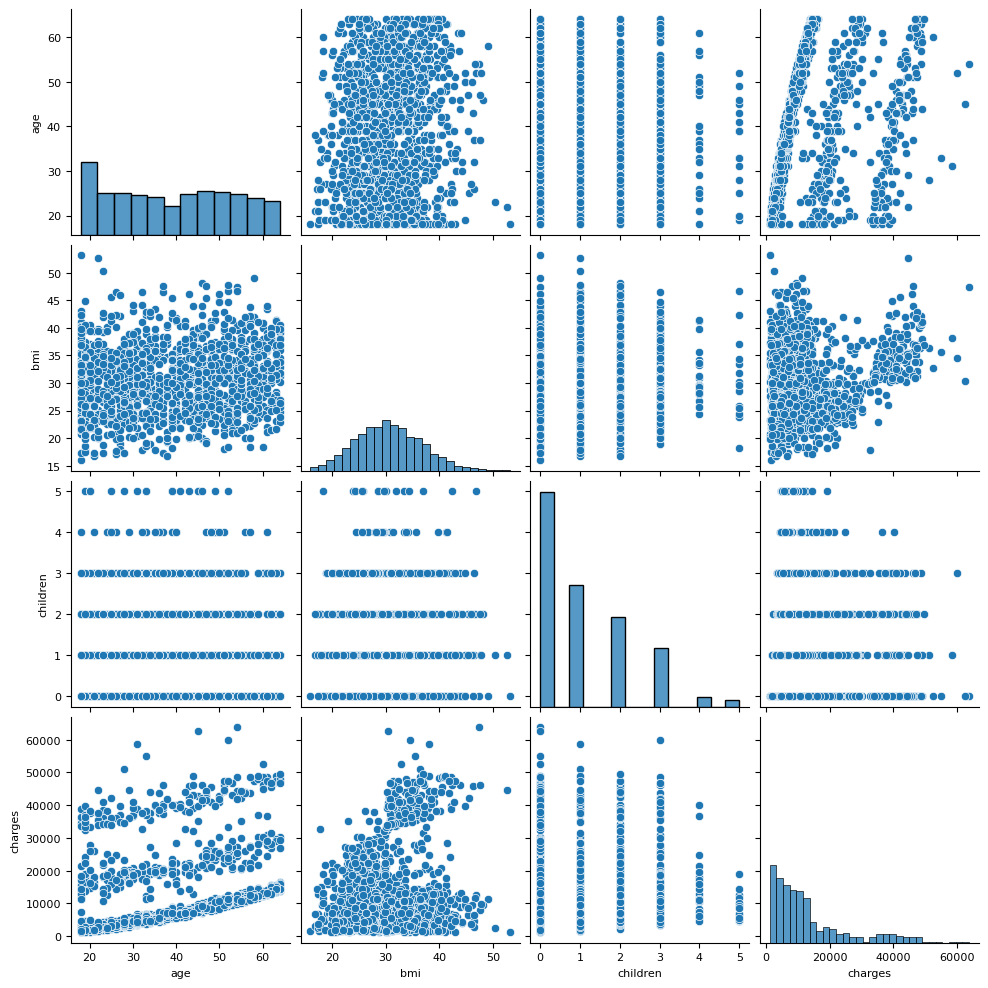

In [39]:
data.dropna(inplace=True)
plt.figure(figsize=(10, 10))
sns.pairplot(data = data);

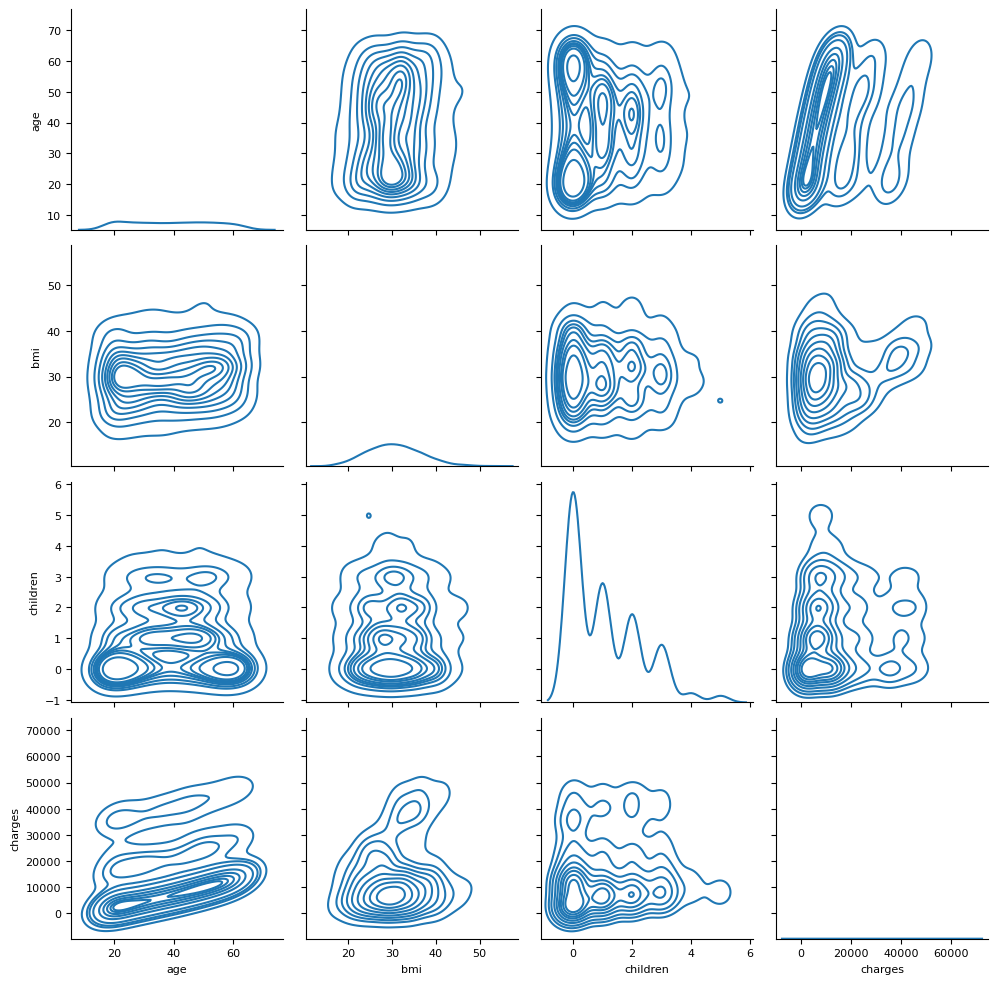

In [42]:
g = sns.PairGrid(data)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)

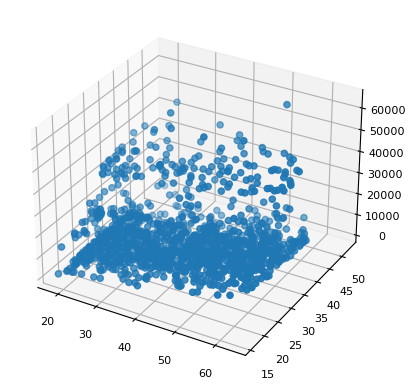

In [48]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

font = {'size': 8}
plt.rc('font', **font)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.age, data.bmi, data.charges)

plt.show()


In [53]:
import pandas as pd
import plotly.express as px 

fig = px.scatter_3d(data, x = 'age', y = 'charges', z = 'bmi', color = 'smoker')
fig.show()